In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from random import sample

In [ ]:
def hopkins (X, m=10):
  #compute the hopkins statistic for the dataset X, m:number of samples (default is 10% of the dataset if not provided)
  n, d=X.shape
  m=min(m,n)
  nbrs=NearestNeighbors(n_neighbors=1).fit(X)
  rand_x=uniform(np.min(X, axis=0),np.max(X,axis=0),(m,d))
  ujd=sum(nbrs.kneighbors(rand_x, return_distance=True)[0])
  sample_X=np.array(sample(list(X),m))
  wjd=sum(nbrs.kneighbors(sample_X, return_distance=True)[0])
  if (ujd+wjd)==0:
    return 0.5
  H=ujd/(ujd+wjd)
  return H

In [ ]:
df=pd.read_csv("/content/archive.zip")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#features
features=['Annual Income (k$)','Spending Score (1-100)']

#standardize
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df[features])

In [ ]:
def hopkins (X, m=10):
  #compute the hopkins statistic for the dataset X, m:number of samples (default is 10% of the dataset if not provided)
  n, d=X.shape
  m=min(m,n)
  nbrs=NearestNeighbors(n_neighbors=1).fit(X)
  rand_x=uniform(np.min(X, axis=0),np.max(X,axis=0),(m,d))
  ujd=sum(nbrs.kneighbors(rand_x, return_distance=True)[0])
  sample_X=np.array(sample(list(X),m))
  wjd=sum(nbrs.kneighbors(sample_X, return_distance=True)[0])
  if (ujd+wjd)==0:
    return 0.5
  H=ujd/(ujd+wjd)
  return H

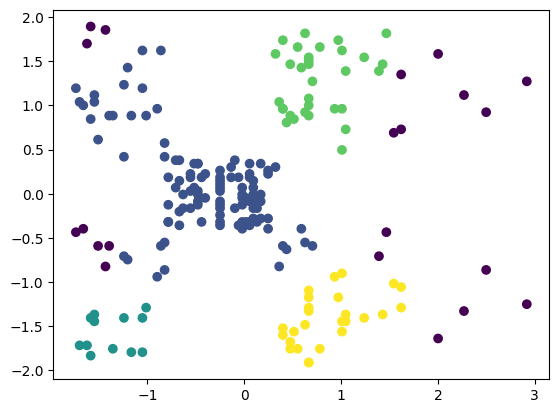

Hopkins Statistic: [1.]


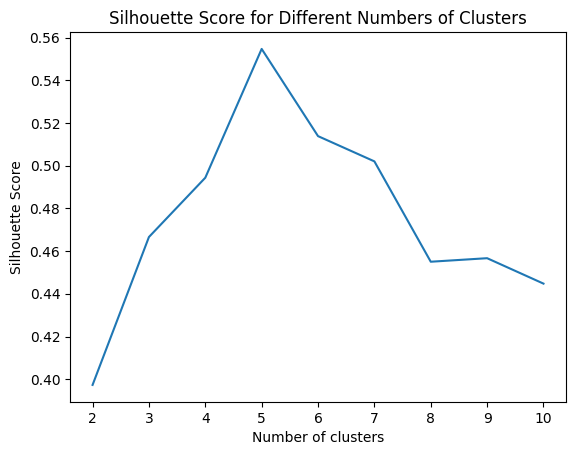

Calinski-Harabasz Score: 62.64964286822598
Davies-Bouldin Score: 1.9136847910184211


In [ ]:
dbscan=DBSCAN(eps=0.5,min_samples=10)
labels=dbscan.fit_predict(df_scaled)

plt.scatter(df_scaled[:,0],df_scaled[:,1],c=labels)
plt.show()

hopkins_statistic=hopkins(df_scaled, m=100)
print("Hopkins Statistic:", hopkins_statistic)

silhoutte_score=[]
for n_cluster in range(2,11):
  from sklearn.cluster import KMeans
  kmeans=KMeans(n_clusters=n_cluster,random_state=42)
  labels=kmeans.fit_predict(df_scaled)
  silhoutte_avg=silhouette_score(df_scaled,labels)
  silhoutte_score.append(silhoutte_avg)

plt.plot(range(2,11),silhoutte_score)
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

dbscan=DBSCAN(eps=0.5,min_samples=10)
labels=dbscan.fit_predict(df_scaled)

calinski_harabasz_score_value = calinski_harabasz_score(df_scaled,labels)
print("Calinski-Harabasz Score:",calinski_harabasz_score_value)

davies_bouldin_score_value = davies_bouldin_score(df_scaled,labels)
print("Davies-Bouldin Score:",davies_bouldin_score_value)